In [293]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import csv
import copy

In [294]:
df= pd.read_csv('accident.csv', encoding = 'cp949') #데이터 불러오기
print(df.info())
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2737 entries, 0 to 2736
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   시도      2737 non-null   object
 1   시군구     2737 non-null   object
 2   지역      2737 non-null   object
 3   발생월     2737 non-null   int64 
 4   사고건수    2737 non-null   int64 
 5   사망자수    2737 non-null   int64 
 6   중상자수    2737 non-null   int64 
 7   경상자수    2737 non-null   int64 
 8   부상신고자수  2737 non-null   int64 
dtypes: int64(6), object(3)
memory usage: 192.6+ KB
None


,시도,시군구,지역,발생월,사고건수,사망자수,중상자수,경상자수,부상신고자수
0,서울,종로구,서울종로구,1,69,3,21,66,6
1,서울,종로구,서울종로구,2,54,0,21,46,8
2,서울,종로구,서울종로구,3,66,0,17,65,10
3,서울,종로구,서울종로구,4,51,0,21,39,6
4,서울,종로구,서울종로구,5,62,0,12,68,11


In [295]:
df.isnull().values.any() #결측치 확인

False

In [296]:
df2=copy.deepcopy(df)

df2['발생월']=df2['발생월'].astype('str')
del df2['사고건수']
ax = df2.sum(axis=1)
df2.insert(8, '전체사상자수', ax, True)
df2
df2.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2737 entries, 0 to 2736
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   시도      2737 non-null   object
 1   시군구     2737 non-null   object
 2   지역      2737 non-null   object
 3   발생월     2737 non-null   object
 4   사망자수    2737 non-null   int64 
 5   중상자수    2737 non-null   int64 
 6   경상자수    2737 non-null   int64 
 7   부상신고자수  2737 non-null   int64 
 8   전체사상자수  2737 non-null   int64 
dtypes: int64(5), object(4)
memory usage: 192.6+ KB


C:\Users\Admin\AppData\Local\Temp\ipykernel_1240\2371643876.py:5: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  ax = df2.sum(axis=1)


In [298]:
df[df['사고건수'] == df.iloc[:, [4]].max()[0]] # 사고건수가 제일 높은 행 출력

df[df['사망자수'] == df.iloc[:, [4, 5]].max()[1]] #사망자수가 제일 높은 행 출력

df[df['중상자수'] == df.iloc[:, [4, 5, 6]].max()[2]] #중상자수가 제일 높은 행 출력

df[df['경상자수'] == df.iloc[:, [4, 5, 6, 7]].max()[3]] #경상자수가 제일 높은 행 출력

df[df['부상신고자수'] == df.iloc[:, [4, 5, 6, 7, 8]].max()[4]] #부상신고자수가 제일 높은 행 출력

,시도,시군구,지역,발생월,사고건수,사망자수,중상자수,경상자수,부상신고자수
748,경기,용인시,경기용인시,5,299,7,60,343,62


In [299]:
df[df['발생월'] == 1]#발생월이 1월인 행 출력

,시도,시군구,지역,발생월,사고건수,사망자수,중상자수,경상자수,부상신고자수
0,서울,종로구,서울종로구,1,69,3,21,66,6
12,서울,중구,서울중구,1,74,0,22,61,2
24,서울,용산구,서울용산구,1,80,1,35,64,6
36,서울,성동구,서울성동구,1,80,0,15,87,3
48,서울,동대문구,서울동대문구,1,101,1,28,102,8
...,...,...,...,...,...,...,...,...,...
2677,울산,남구,울산남구,1,79,0,18,80,10
2689,울산,동구,울산동구,1,48,0,11,54,0
2701,울산,북구,울산북구,1,48,0,14,54,7
2713,울산,울주군,울산울주군,1,45,0,13,46,5


       종류      건수
0    사고건수  203130
1    사망자수    2916
2    중상자수   55905
3    경상자수  219283
4  부상신고자수   16420
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   종류      5 non-null      object
 1   건수      5 non-null      int64 
dtypes: int64(1), object(1)
memory usage: 208.0+ bytes


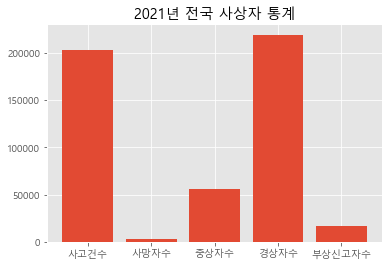

In [300]:
#전국 사상자 통계
df_sum = np.sum(df.iloc[:, [4, 5, 6, 7, 8]], axis=0)
df_sum = (df_sum.reset_index())
pd.DataFrame(df_sum.rename(columns={'index': '종류',  0: '건수'}, inplace=True))
print(df_sum)
df_sum.info()
df_sum

plt.style.use('ggplot')
plt.rc('font', family = 'Malgun Gothic')
plt.bar(df_sum['종류'], df_sum['건수'])
plt.title('2021년 전국 사상자 통계')
plt.show()

In [301]:
df_sum2 = np.sum(df2.iloc[:, [4, 5, 6, 7, 8]], axis=0)
a = round((df_sum2[0]/df_sum2[4]),3).astype(str)
b = round((df_sum2[1]/df_sum2[4]),3).astype(str)
c = round((df_sum2[2]/df_sum2[4]),3).astype(str)
d = round((df_sum2[3]/df_sum2[4]),3).astype(str)

print('전국 교통사고 사망률은 ' + a + '% 입니다.')
print('전국 교통사고 중상률은 ' + b + '% 입니다.')
print('전국 교통사고 경상률은 ' + c + '% 입니다.')
print('전국 교통사고 부상신고율은 ' + d + '% 입니다.')

전국 교통사고 사망률은 0.01% 입니다.
전국 교통사고 중상률은 0.19% 입니다.
전국 교통사고 경상률은 0.745% 입니다.
전국 교통사고 부상신고율은 0.056% 입니다.


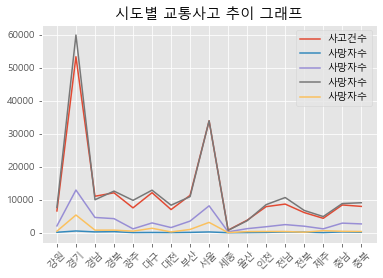

In [302]:
#시도별 교통사고 추이 그래프
gb3=df.groupby('시도').sum()
gb3 = (gb3.reset_index())
gb3


plt.style.use('ggplot')
plt.rc('font', family = 'Malgun Gothic')
plt.plot(gb3['시도'], gb3['사고건수'], label='사고건수')
plt.plot(gb3['시도'], gb3['사망자수'], label='사망자수')
plt.plot(gb3['시도'], gb3['중상자수'], label='사망자수')
plt.plot(gb3['시도'], gb3['경상자수'], label='사망자수')
plt.plot(gb3['시도'], gb3['부상신고자수'], label='사망자수')
plt.legend()
plt.xticks(rotation=45)
plt.title('시도별 교통사고 추이 그래프')
plt.show()

원하는 지역의 이름을 입력해주세요: 경북안동시


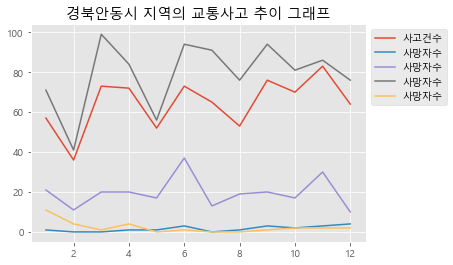

In [303]:
#지역별 교통사고 추이 그래프

name = input('원하는 지역의 이름을 입력해주세요: ')

a = df[df['지역'] == name]

plt.style.use('ggplot')
plt.rc('font', family = 'Malgun Gothic')
plt.plot(a['발생월'], a['사고건수'], label='사고건수')
plt.plot(a['발생월'], a['사망자수'], label='사망자수')
plt.plot(a['발생월'], a['중상자수'], label='사망자수')
plt.plot(a['발생월'], a['경상자수'], label='사망자수')
plt.plot(a['발생월'], a['부상신고자수'], label='사망자수')
plt.legend(bbox_to_anchor=(1, 1))
plt.title(name + ' 지역의 교통사고 추이 그래프')
plt.show()

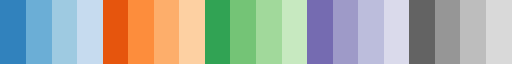

In [304]:
#pieplot color 
cmap = plt.get_cmap('tab20c')
c=cmap(np.array([0, 1, 2, 3]))
cmap

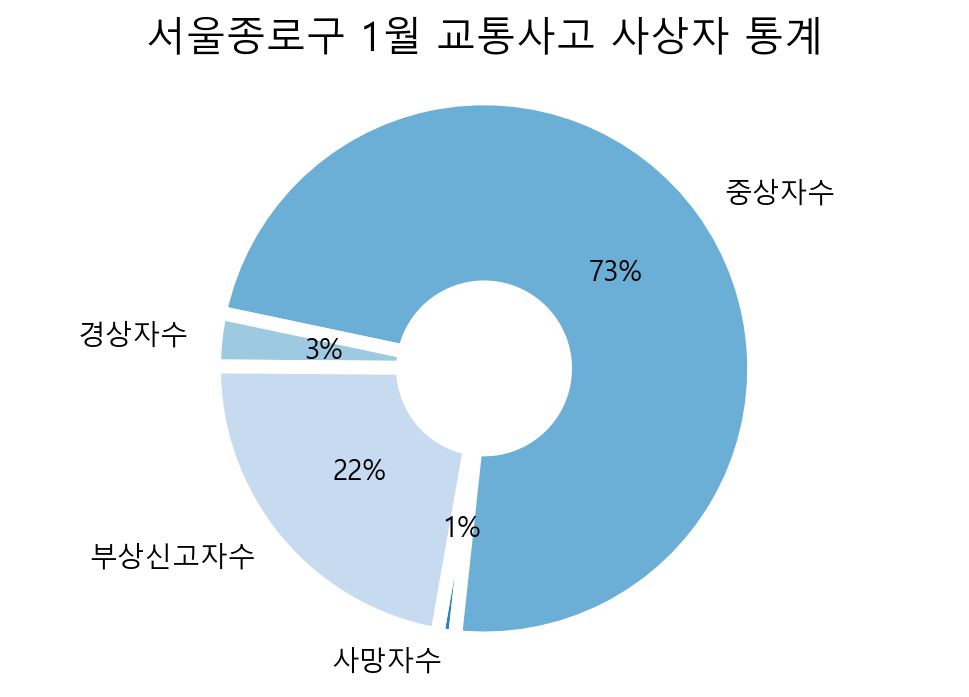

In [305]:
#각 지역의 월 별 교통사고 사상자 통계 [1개만 추출]
df['발생월']=df['발생월'].astype('str') #변수 형 변환

sample_accident = df.iloc[0]

label = ['사망자수', '중상자수', '경상자수', '부상신고자수']
#c = ['#1F91E7', '#639AC3', '#88C2EE', '#AACDE5']
wedgeprops={'width':0.7, 'edgecolor':'w', 'linewidth':5}

plt.rc('font', family='Malgun Gothic') 
plt.figure(dpi = 200)
plt.title(sample_accident[2] + ' ' + sample_accident[3]+'월 교통사고 사상자 통계') #월 추가
plt.pie(sample_accident[3:7], labels = label, colors = c, autopct = '%1.f%%', startangle=260, 
            counterclock=True, wedgeprops=wedgeprops) #비율 및 범례 추기

plt.axis('equal')
plt.show()


df['발생월']=df['발생월'].astype('int64') #변수 형 변환

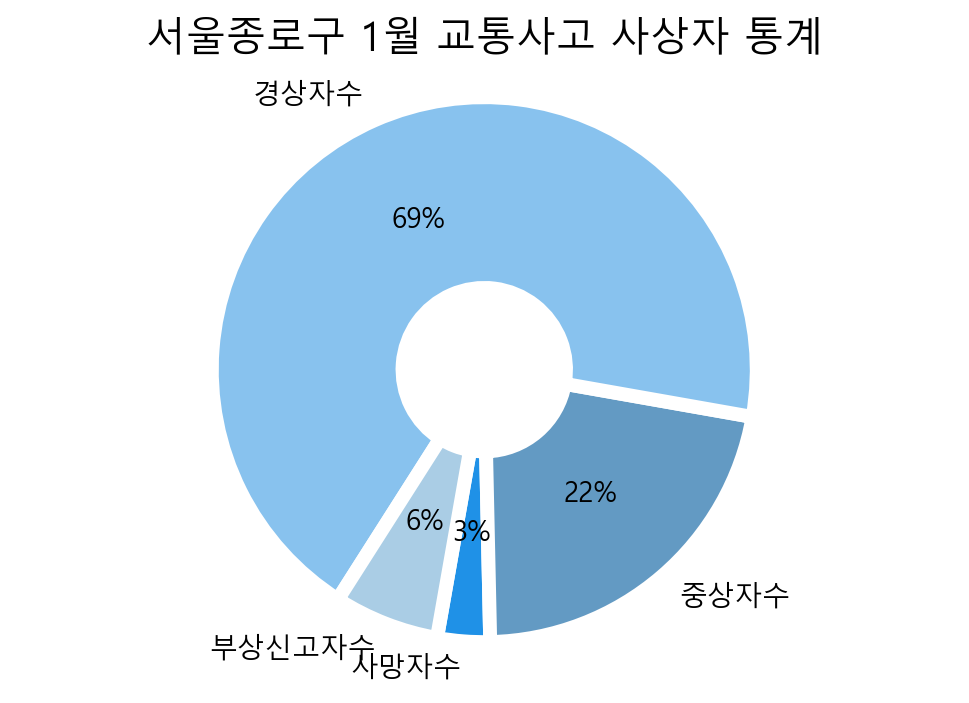

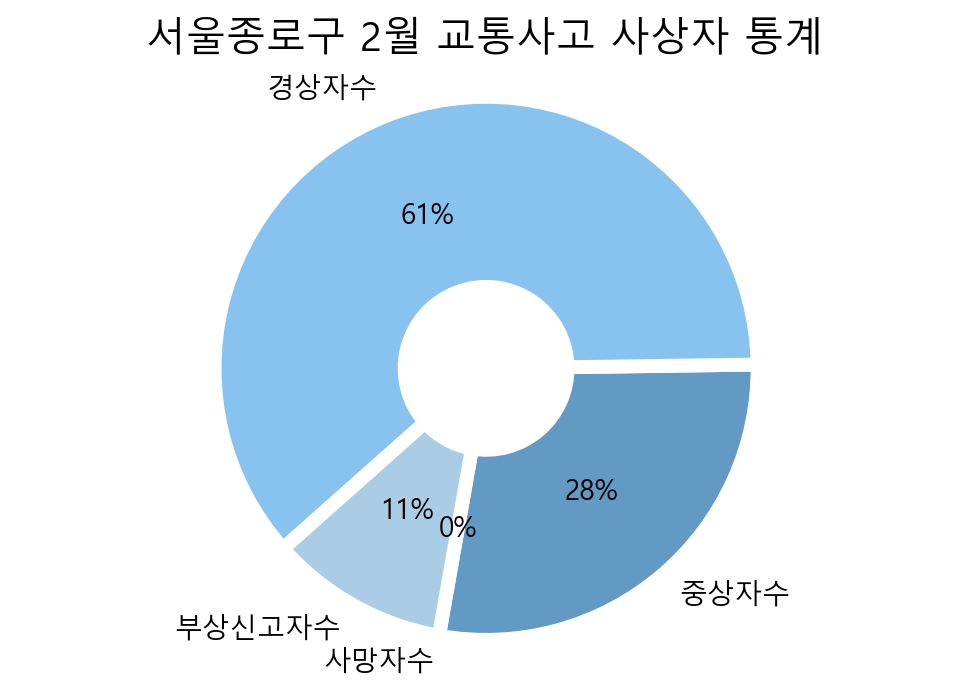

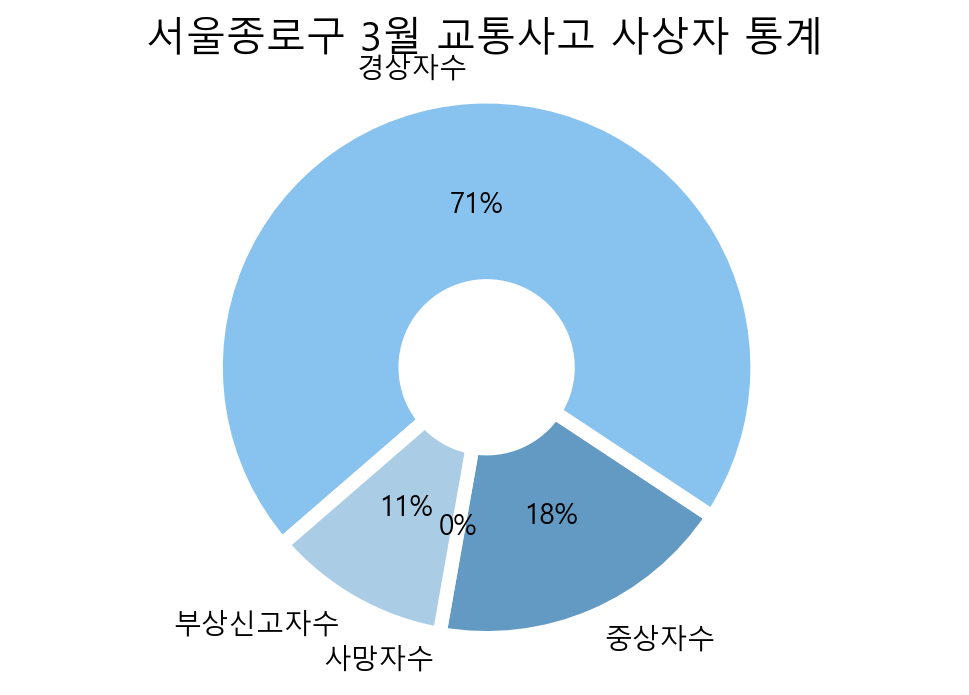

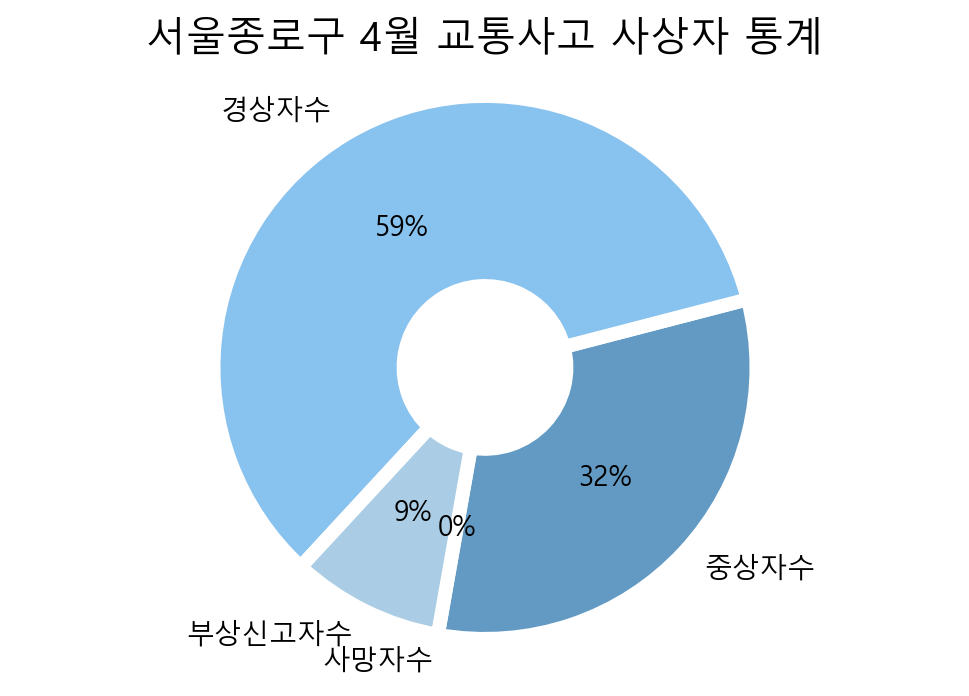

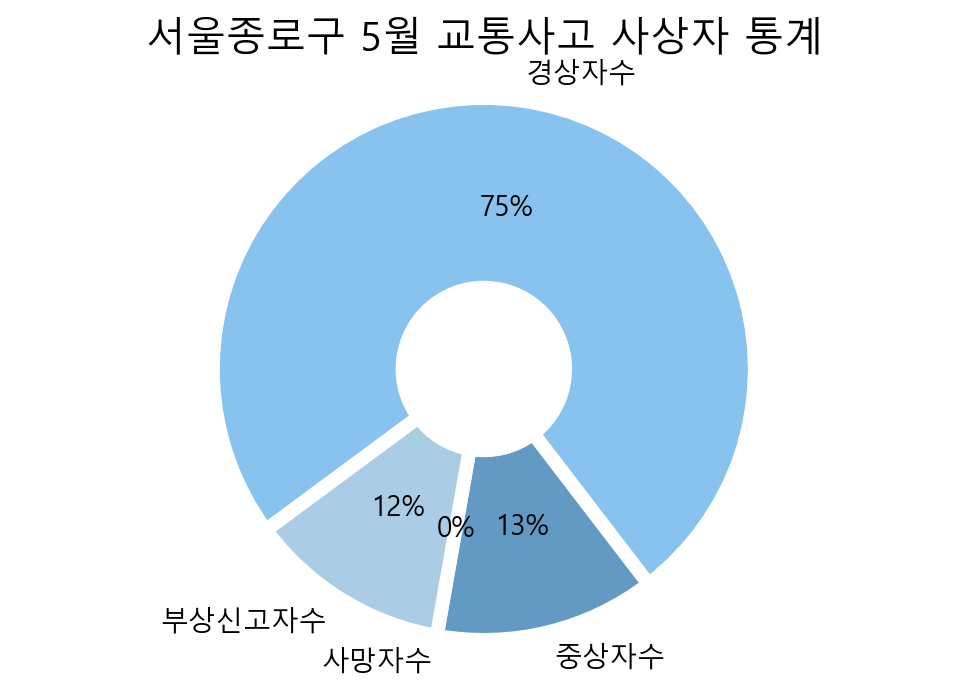

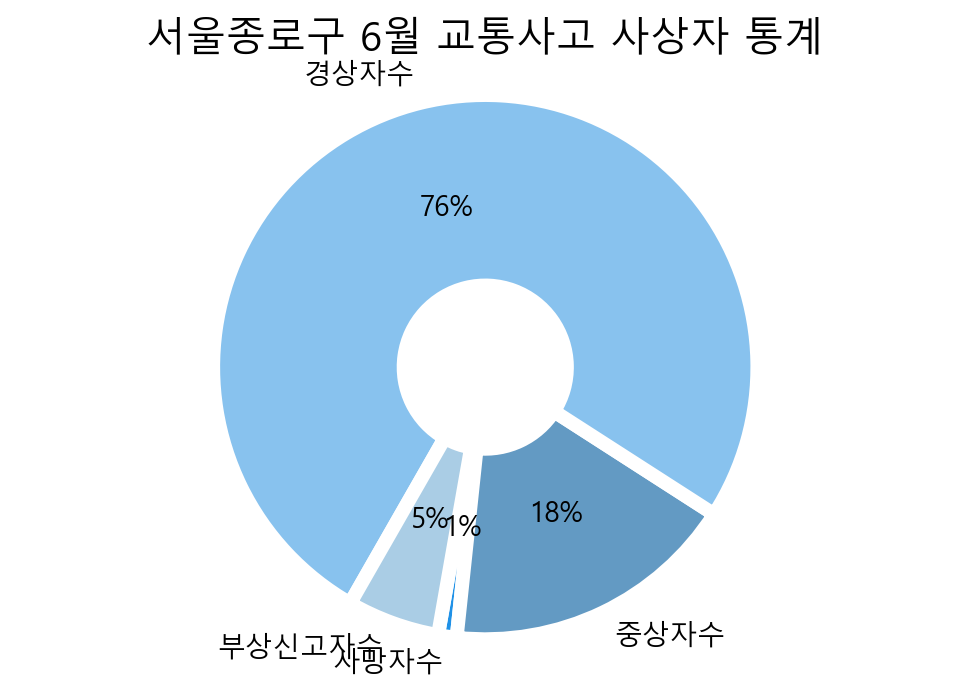

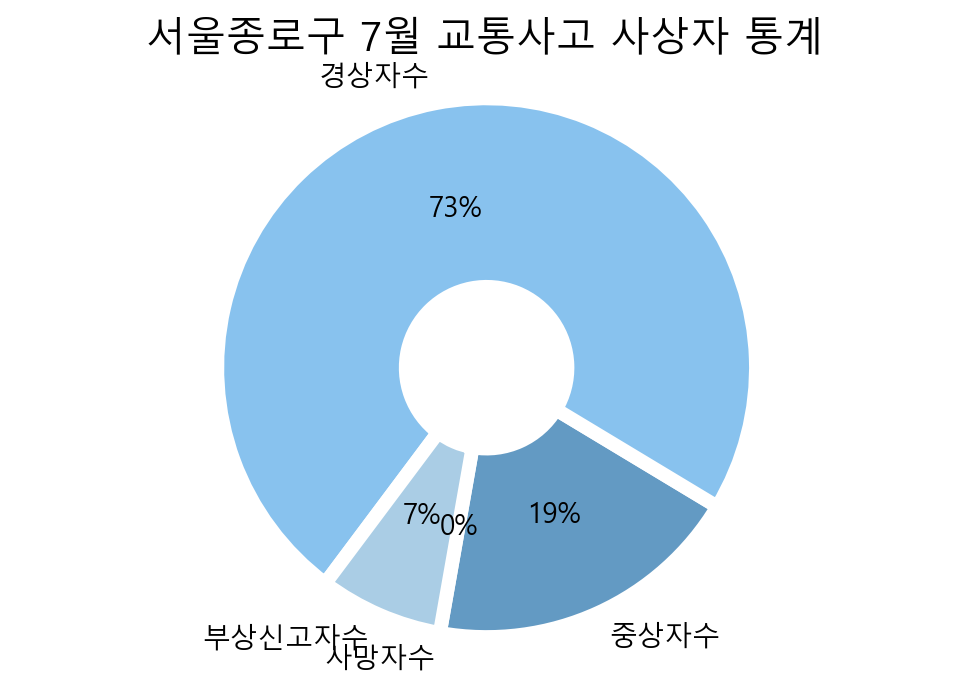

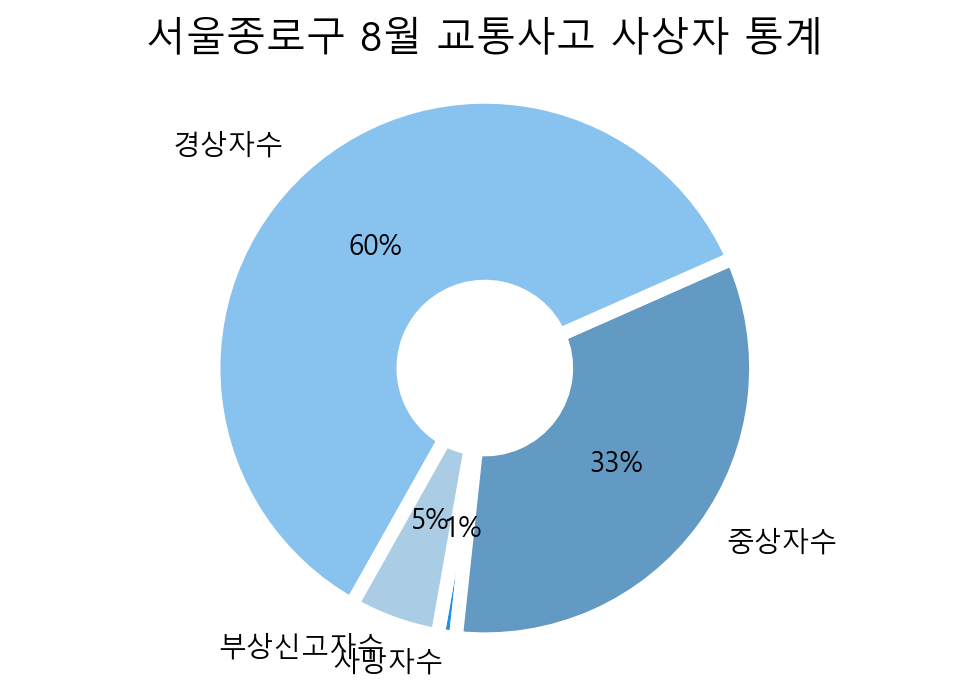

KeyboardInterrupt: 

In [306]:
#각 지역의 월 별 교통사고 사상자 통계 [전체 추출]
df['발생월']=df['발생월'].astype('str') #변수 형 변환

f = open('accident.csv')
data = csv.reader(f)
next(data)

label = ['사망자수', '중상자수', '경상자수', '부상신고자수']
c = ['#1F91E7', '#639AC3', '#88C2EE', '#AACDE5']
wedgeprops={'width':0.7, 'edgecolor':'w', 'linewidth':5}
plt.rc('font', family='Malgun Gothic') 
for row in data:
    for i in range(5,8):
        row[i] = int(row[i])
    plt.figure(dpi = 200)
    plt.title(row[2] + ' ' + row[3]+'월 교통사고 사상자 통계')
    plt.pie(row[5:9], labels = label, colors = c, autopct = '%1.f%%', startangle=260, 
            counterclock=True, wedgeprops=wedgeprops) #비율 및 범례 추기
    plt.axis('equal')
    plt.show()
    
df['발생월']=df['발생월'].astype('int64') #변수 형 변환

사고건수가 가장 많은 월은 10월 입니다.


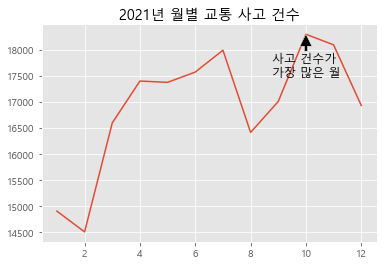

In [307]:
#사고건수가 제일 많은 월 출력
df['발생월']=df['발생월'].astype('int64') #변수 형 변환

gb=df.groupby('발생월').sum()
gb.reset_index(drop=False, inplace=True)

i = np.argmax(gb['사고건수'])
month = gb.iloc[i]['발생월'].astype('str')

np.max(gb['사고건수'])
print('사고건수가 가장 많은 월은 '+ month + '월 입니다.')
plt.style.use('ggplot')
plt.rc('font', family = 'Malgun Gothic')
plt.plot(gb['발생월'], gb['사고건수'])
plt.title('2021년 월별 교통 사고 건수') 
plt.annotate('사고 건수가 \n가장 많은 월',xy=(10,18300),xytext = (10,17500), 
             arrowprops = dict(facecolor='black',width=3),ha='center',size=12)

plt.show()

In [308]:
#사고건수가 제일 많은 지역 출력
gb2=df.groupby('지역').sum()
#del gb2['발생월']
gb2.reset_index(drop=False, inplace=True)

i = np.argmax(gb2['사고건수'])
region = gb2.iloc[i]['지역']

#np.max(gb['사고건수'])
print('사고건수가 가장 많은 지역은 '+ region + ' 입니다.')

사고건수가 가장 많은 지역은 경기수원시 입니다.


원하는 지역의 이름을 입력해주세요 : 경북안동시


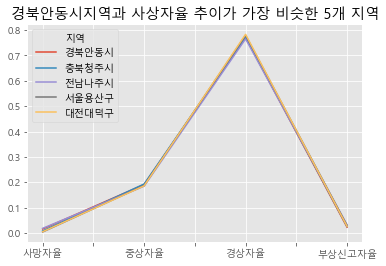

In [309]:
#원하는 지역과 사상자율 추이가 가장 비슷한 5개 지역 출력
df3 = df2.set_index('지역')
df3=df3.groupby('지역').sum()
df3

plt.rc('font', family ='Malgun Gothic')
df4 = df3.div(df3['전체사상자수'], axis = 0)   
pd.DataFrame(df4.rename(columns={'사망자수': '사망자율',  '중상자수': '중상자율', '경상자수':'경상자율', '부상신고자수':'부상신고자율'}, 
                        inplace=True))

del df4['전체사상자수']
name = input('원하는 지역의 이름을 입력해주세요 : ') 
a = df4.index.str.contains(name)
df5 = df4[a]

df4.loc[np.power(df4.sub(df5.iloc[0], axis = 1), 2).sum(axis = 1).sort_values().index[:5]].T.plot()
plt.style.use('ggplot')
plt.rc('font', family = 'Malgun Gothic')
plt.title(name + '지역과 사상자율 추이가 가장 비슷한 5개 지역')
plt.show()
#사상자율 추이가 가장 비슷한 지역 추출.